In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from utils.predictiveNet import PredictiveNet
import matplotlib.pyplot as plt
import numpy as np
from utils.general import saveFig
import itertools
import torch
import random
from utils.agent import RandomActionAgent
from analysis.representationalGeometryAnalysis import representationalGeometryAnalysis

In [4]:
savefolder = 'Figures/S12_LayerNormEtc/'

In [5]:
nettypes = ['AutoencoderPred','AutoencoderPred_LN','thRNN_5win_noLN','thRNN_5win']
hpidx = ['0','1','2','3']
seeds = ['100','101','102','103','104','105']
#lr = [1e-4,1.5e-4,3e-4,5.5e-4,1e-3,1.5e-3,3e-3]
netprops = itertools.product(*[nettypes,['-'],hpidx,['-s'],seeds])
netprops = list(netprops)
netnames = [''.join(name) for name in netprops]
nettype = [name[0] for name in netprops]
#netmask = [name[4] for name in netprops]
netk = [int(name[2]) for name in netprops]

netfolder = '/compareSP_panel/'

analysisFrame = pd.DataFrame(data={'filename':netnames, 'type':nettype, 'netfolder':netfolder})

In [6]:
#netfolder = '/hyperparm_panel_masked/'
def loadNet(row):
    netfolder = row.netfolder
    try:
        net = PredictiveNet.loadNet(netfolder+row['filename'],suppressText=True)
        return net
    except:
        print(f"{row['filename']} does not exist")
        #net = PredictiveNet
        

analysisFrame['net'] = analysisFrame.apply(loadNet, axis = 1)


In [7]:
#analysisFrame['net'][0].trainArgs
def getTrainParms(row):
    predictiveNet = row['net']
    lr = predictiveNet.trainArgs.lr
    seed = predictiveNet.trainArgs.seed
    weight_decay = predictiveNet.trainArgs.weight_decay
    bptttrunc = predictiveNet.trainArgs.bptttrunc
    seqdur = predictiveNet.trainArgs.seqdur
    dropp = predictiveNet.trainArgs.dropout
    ntimescale = predictiveNet.trainArgs.ntimescale
    nneurons = predictiveNet.trainArgs.hiddensize
    noisestd = predictiveNet.trainArgs.noisestd
    sparsity = predictiveNet.trainArgs.sparsity
    
    return lr,bptttrunc,seqdur,seed,dropp,ntimescale,weight_decay,nneurons,noisestd,sparsity
analysisFrame[['lr','bptt','seqdur','seed','dropp','ntimescale','weight_decay','nneurons','noisestd','sparsity']] = analysisFrame.apply(getTrainParms, axis = 1, result_type="expand")


In [8]:
#Calculate spatial info and decoding performance
def getSpatialRep(row):
    predictiveNet = loadNet(row)
    if predictiveNet == None:
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    #predictiveNet= row.net
    #print(len(predictiveNet.TrainingSaver['sRSA'].values))
    try:
        SI = predictiveNet.TrainingSaver['SI'].values[-1]
        sRSA = predictiveNet.TrainingSaver['sRSA'].values[-1]

        EVs = predictiveNet.TrainingSaver['EVs'].values[-1]
        
        SWdist = predictiveNet.TrainingSaver['SWdist'].values[-1]
        finalLoss = predictiveNet.TrainingSaver['loss'].values[-1]
    except:
        SI = predictiveNet.TrainingSaver['SI']
        sRSA = predictiveNet.TrainingSaver['sRSA']

        EVs = predictiveNet.TrainingSaver['EVs']
        
        SWdist = predictiveNet.TrainingSaver['SWdist']
        finalLoss = predictiveNet.TrainingSaver['loss']
        
    meanSI = np.nanmean(SI)
    EVsp50 = np.nanmean(EVs>0.5)
    tunedSI = np.nanmean(SI[EVs>0.5])
    
    return SI, meanSI, sRSA, EVs, EVsp50, finalLoss, SWdist, tunedSI
analysisFrame[['SI','meanSI','sRSA','EVs','EVs50','finalLoss','SWdist','tunedSI']] = analysisFrame.apply(getSpatialRep, axis = 1, result_type="expand")

<Figure size 640x480 with 0 Axes>

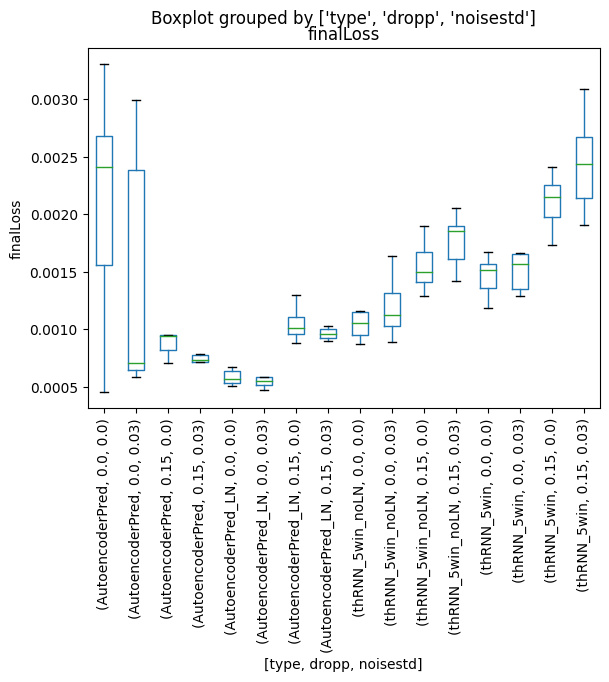

<Figure size 640x480 with 0 Axes>

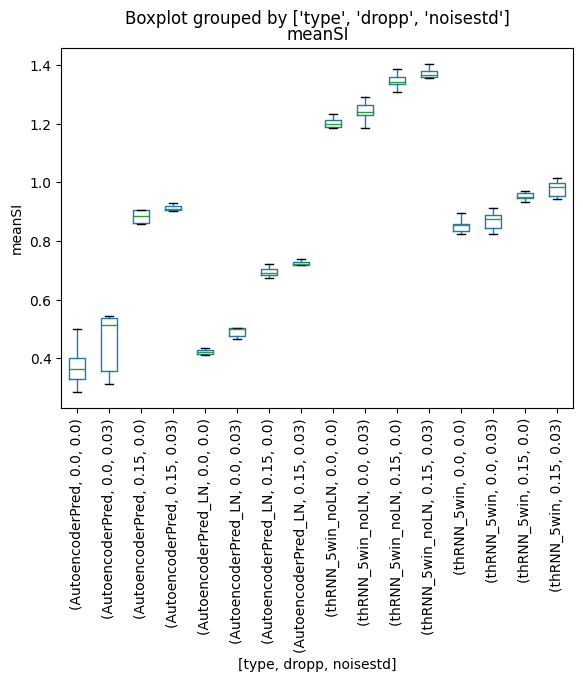

<Figure size 640x480 with 0 Axes>

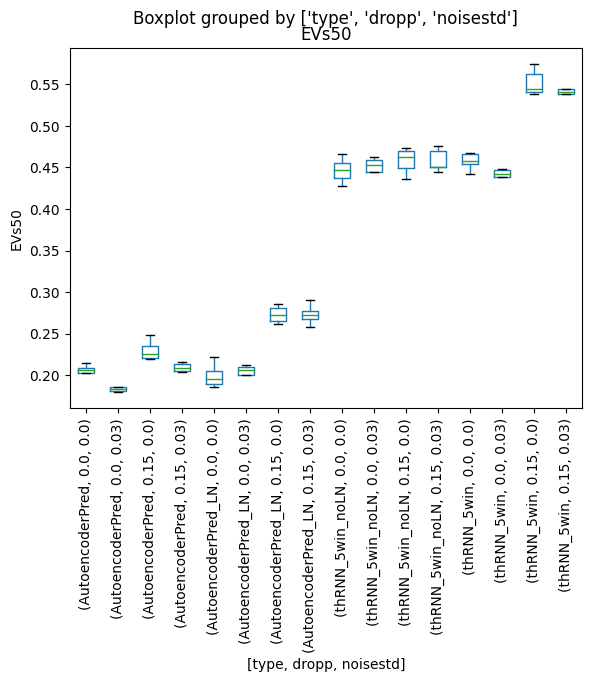

<Figure size 640x480 with 0 Axes>

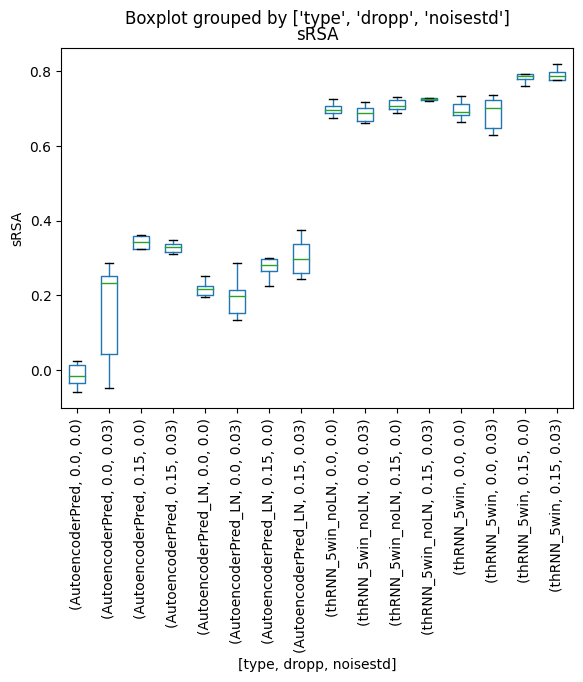

<Figure size 640x480 with 0 Axes>

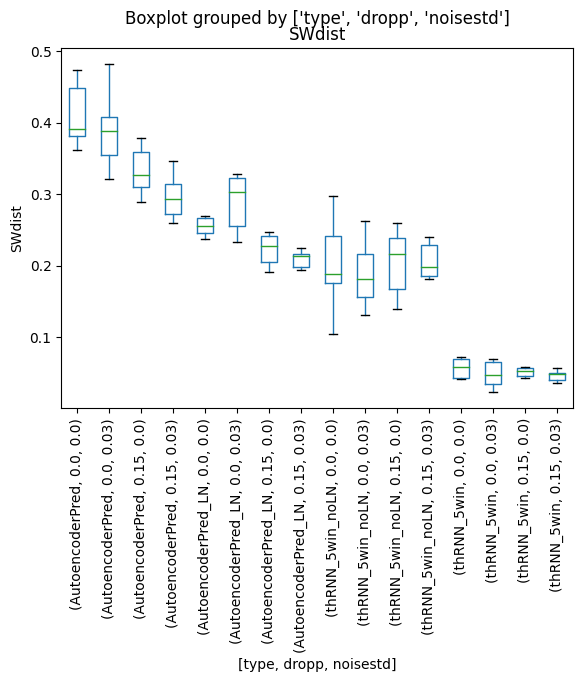

In [20]:
metrics = ['finalLoss','meanSI','EVs50','sRSA','SWdist']
for metric in metrics:
    plt.figure()
    #ax=plt.subplot(3,3,1)
    analysisFrame.boxplot(column=metric,by=["type","dropp","noisestd"],
                          rot=90,grid=False,showfliers=False,
                          positions=[1,2,3,4,5,6,7,8,13,14,15,16,9,10,11,12])
    plt.ylabel(metric)
    saveFig(plt.gcf(),'CompareNets'+metric,savefolder,
            filetype='pdf')

#plt.figure()
#analysisFrame.boxplot(column='meanSI',by=["type","dropp","noisestd"],rot=90)
#plt.figure()
#analysisFrame.boxplot(column='EVs50',by=["type","dropp","noisestd"],rot=90)
#plt.figure()
#analysisFrame.boxplot(column='tunedSI',by=["type","dropp","noisestd"],rot=90)
#plt.figure()
#analysisFrame.boxplot(column='sRSA',by=["type","dropp","noisestd"],rot=90)
#plt.figure()
#analysisFrame.boxplot(column='SWdist',by=["type","dropp","noisestd"],rot=90)


IndexingError: Too many indexers

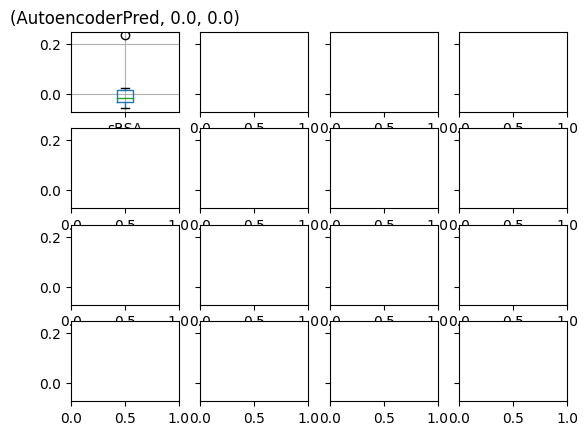

In [27]:
#analysisFrame.groupby("filename").boxplot(column="sRSA")
test = analysisFrame.groupby(["type","dropp","noisestd"]).boxplot(column="sRSA")

In [7]:
exSeed = 102
analysisFrame_exSeed = analysisFrame[analysisFrame.seed==exSeed]
analysisFrame_exSeed

,filename,type,netfolder,net,lr,bptt,seqdur,seed,dropp,ntimescale,weight_decay,nneurons,noisestd,sparsity
2,AutoencoderPred-0-s102,AutoencoderPred,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.00,2.0,0.003,500.0,0.03,0.5
8,AutoencoderPred-1-s102,AutoencoderPred,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.00,2.0,0.003,500.0,0.00,0.5
14,AutoencoderPred-2-s102,AutoencoderPred,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.15,2.0,0.003,500.0,0.03,0.5
20,AutoencoderPred-3-s102,AutoencoderPred,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.15,2.0,0.003,500.0,0.00,0.5
26,AutoencoderPred_LN-0-s102,AutoencoderPred_LN,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.00,2.0,0.003,500.0,0.03,0.5
32,AutoencoderPred_LN-1-s102,AutoencoderPred_LN,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.00,2.0,0.003,500.0,0.00,0.5
38,AutoencoderPred_LN-2-s102,AutoencoderPred_LN,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.15,2.0,0.003,500.0,0.03,0.5
44,AutoencoderPred_LN-3-s102,AutoencoderPred_LN,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.15,2.0,0.003,500.0,0.00,0.5
50,thRNN_5win_noLN-0-s102,thRNN_5win_noLN,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.00,2.0,0.003,500.0,0.03,0.5
56,thRNN_5win_noLN-1-s102,thRNN_5win_noLN,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,102.0,0.00,2.0,0.003,500.0,0.00,0.5


In [12]:
from analysis.SpatialTuningAnalysis import SpatialTuningAnalysis

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred
0.0
0.03


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: divide by zero encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))
/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


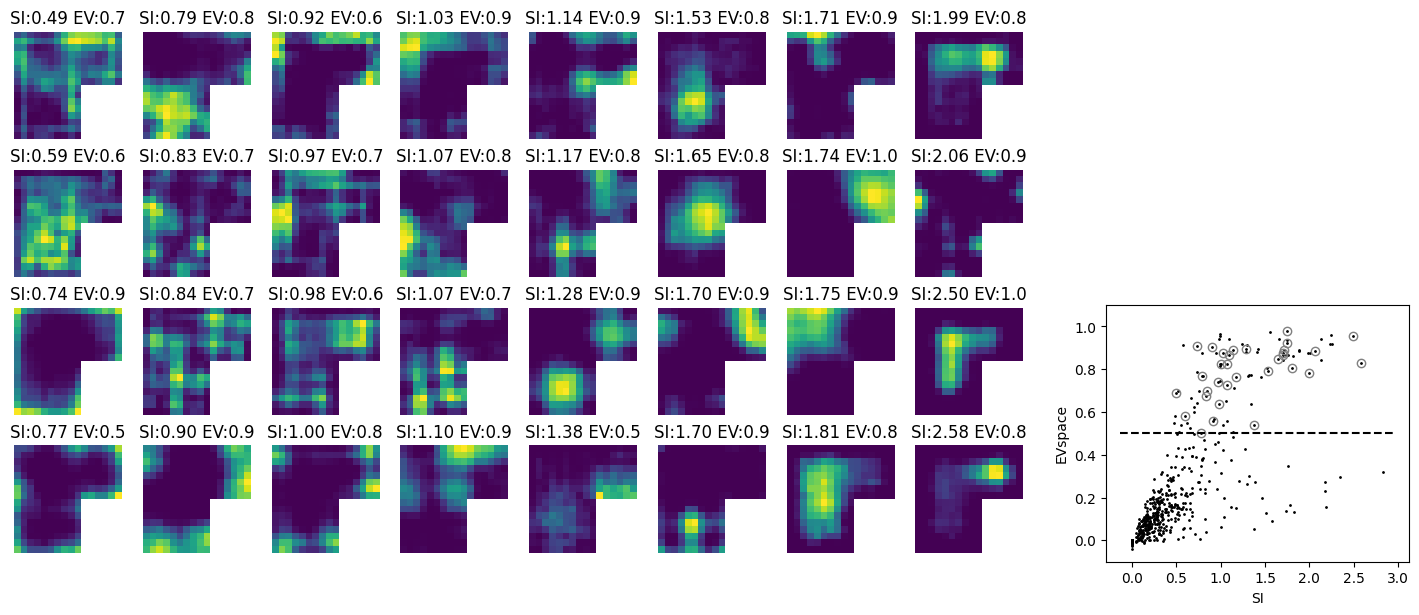

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred
0.0
0.0


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: divide by zero encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))
/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


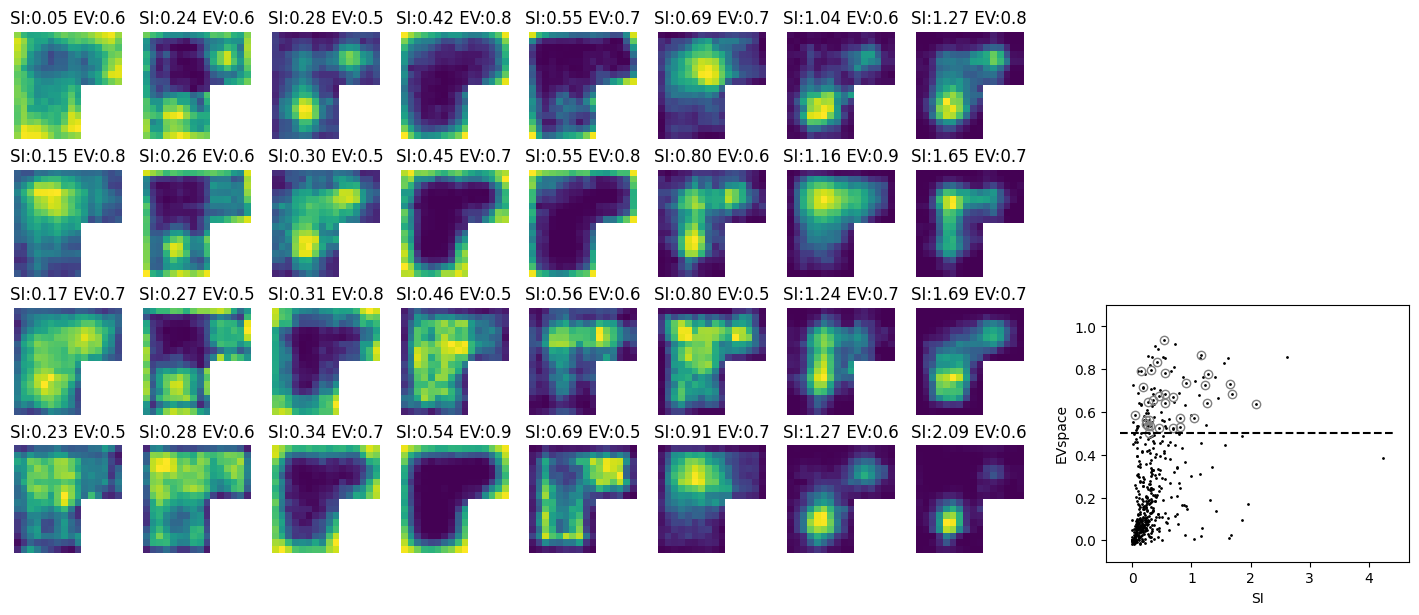

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred
0.15
0.03


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


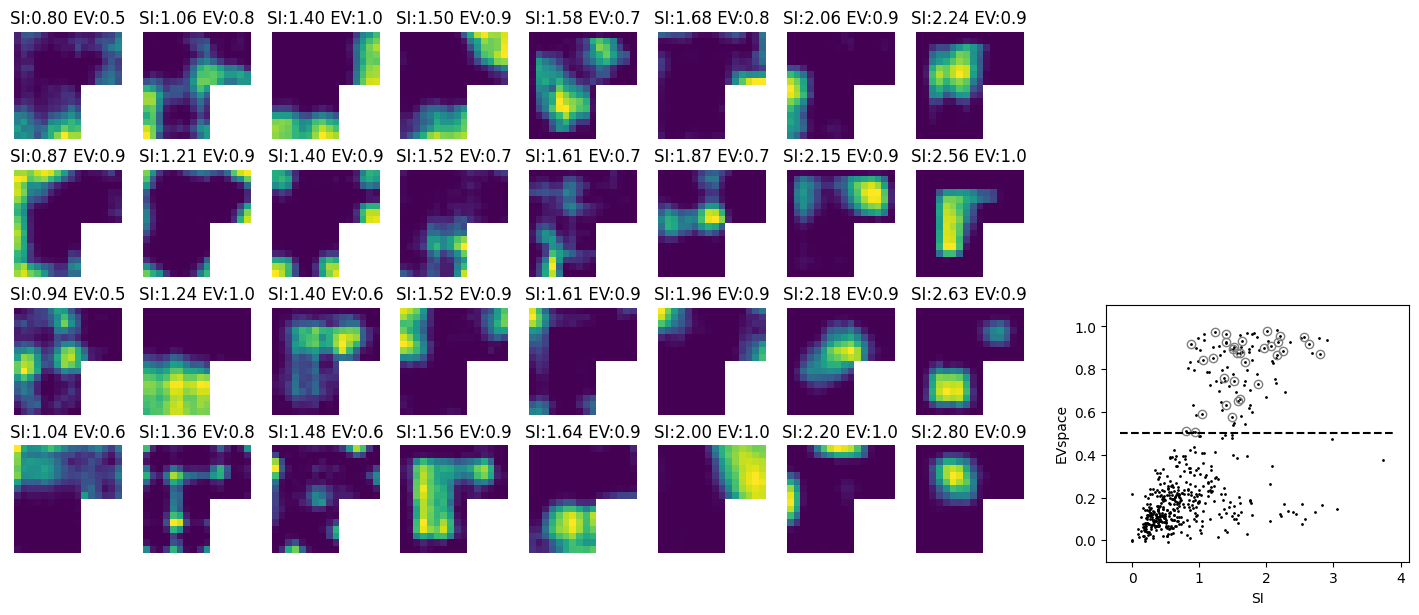

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred
0.15
0.0


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


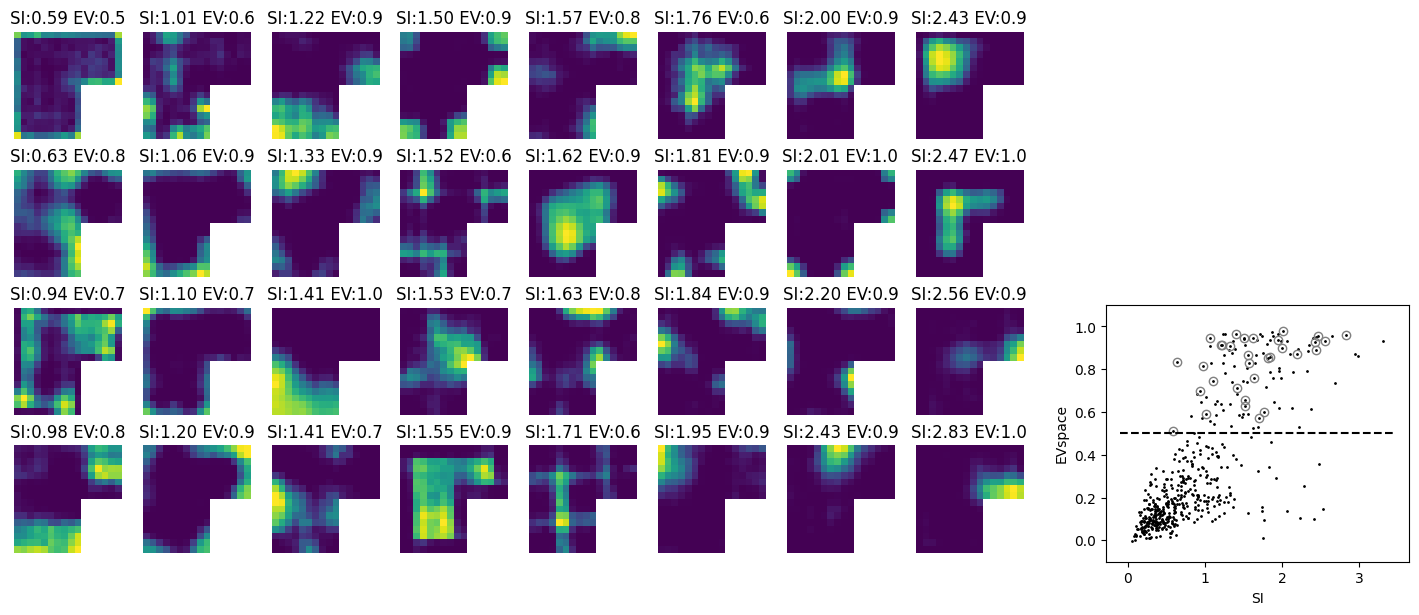

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred_LN
0.0
0.03


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


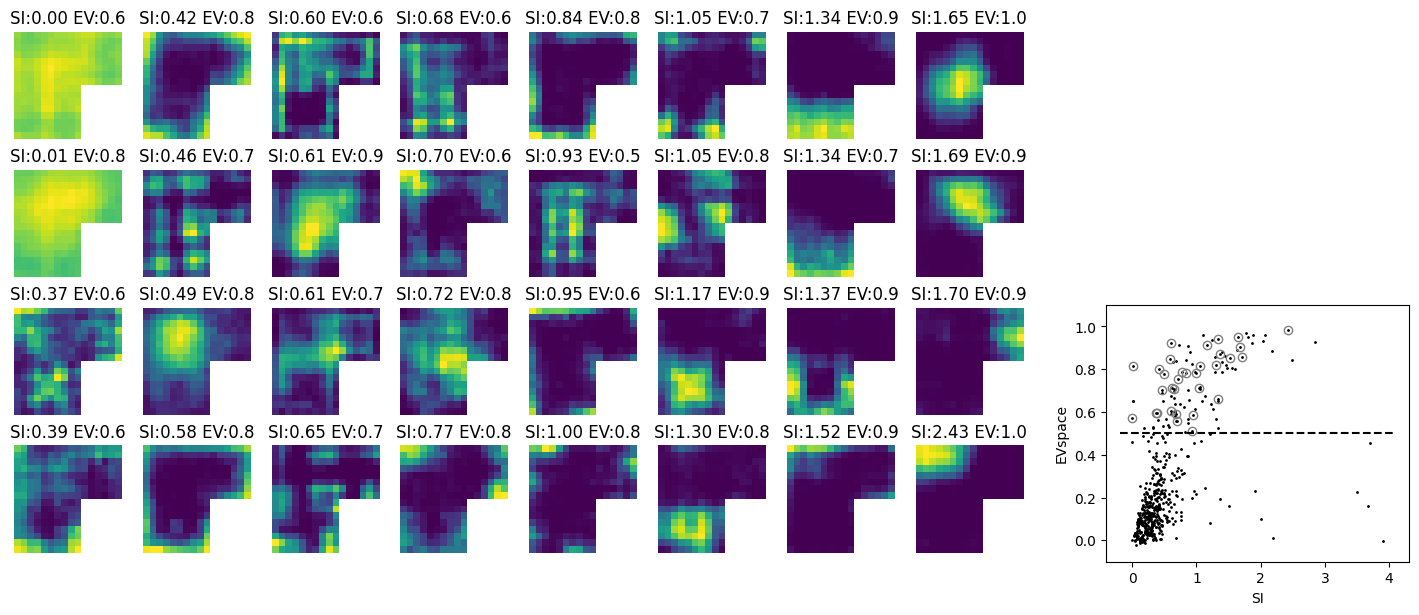

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred_LN
0.0
0.0


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


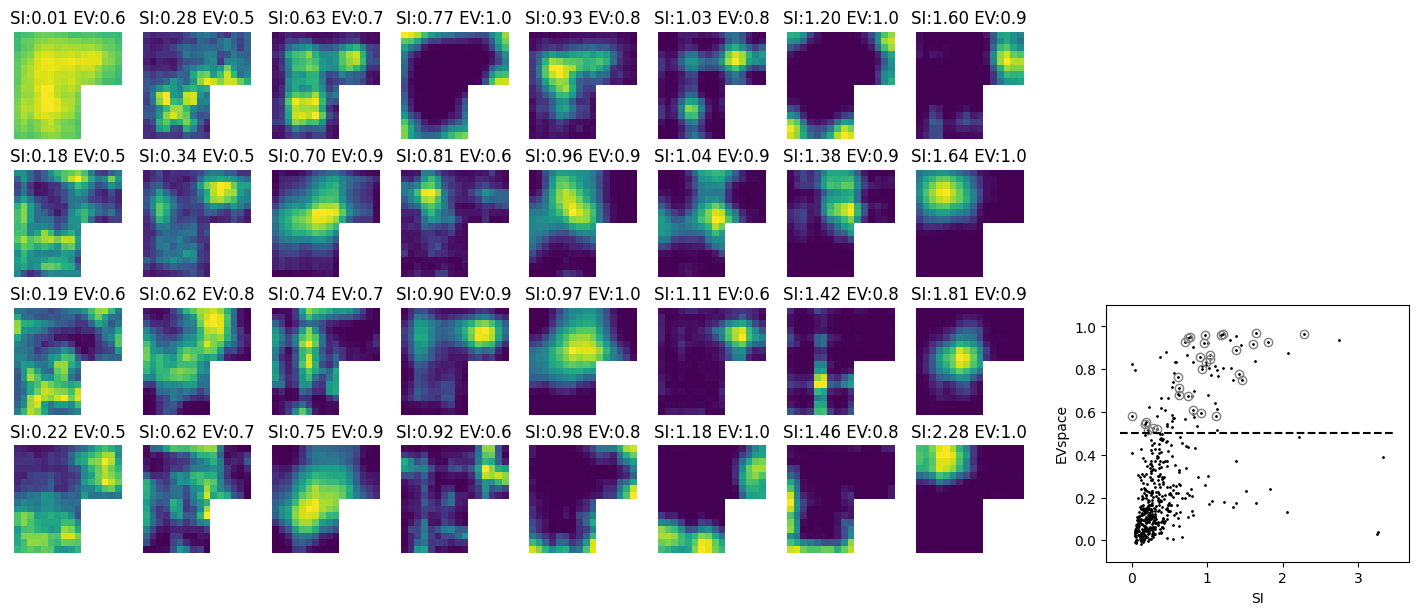

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred_LN
0.15
0.03


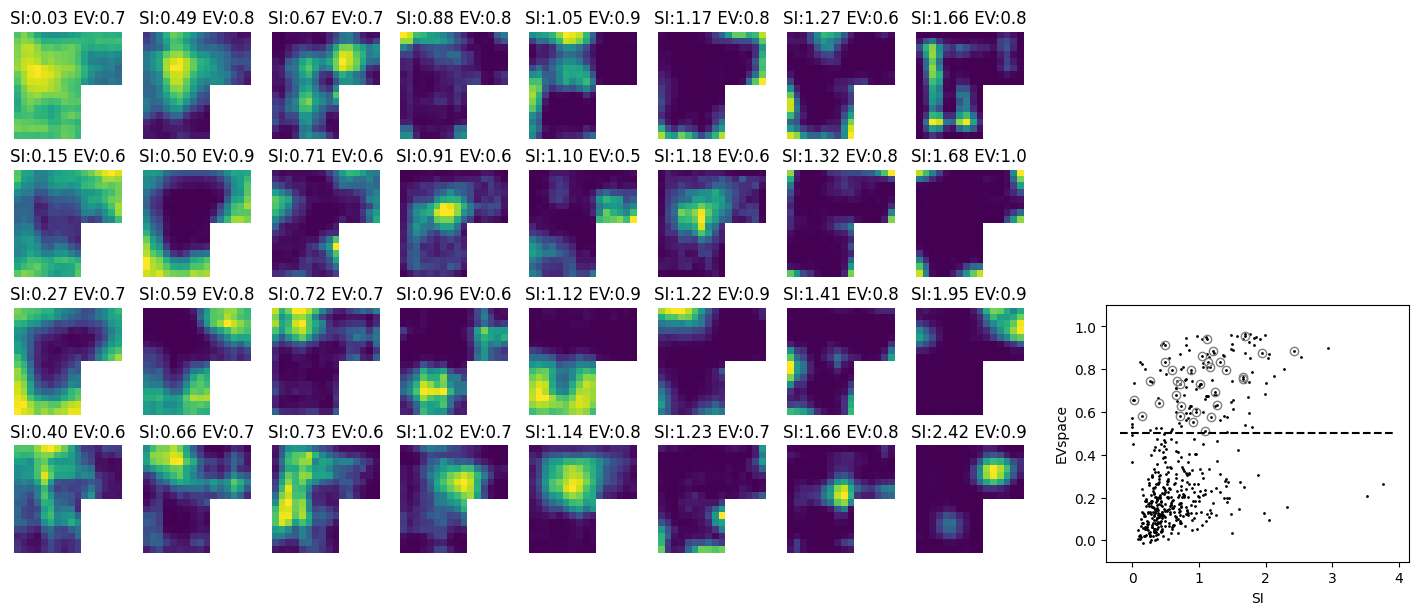

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control
AutoencoderPred_LN
0.15
0.0


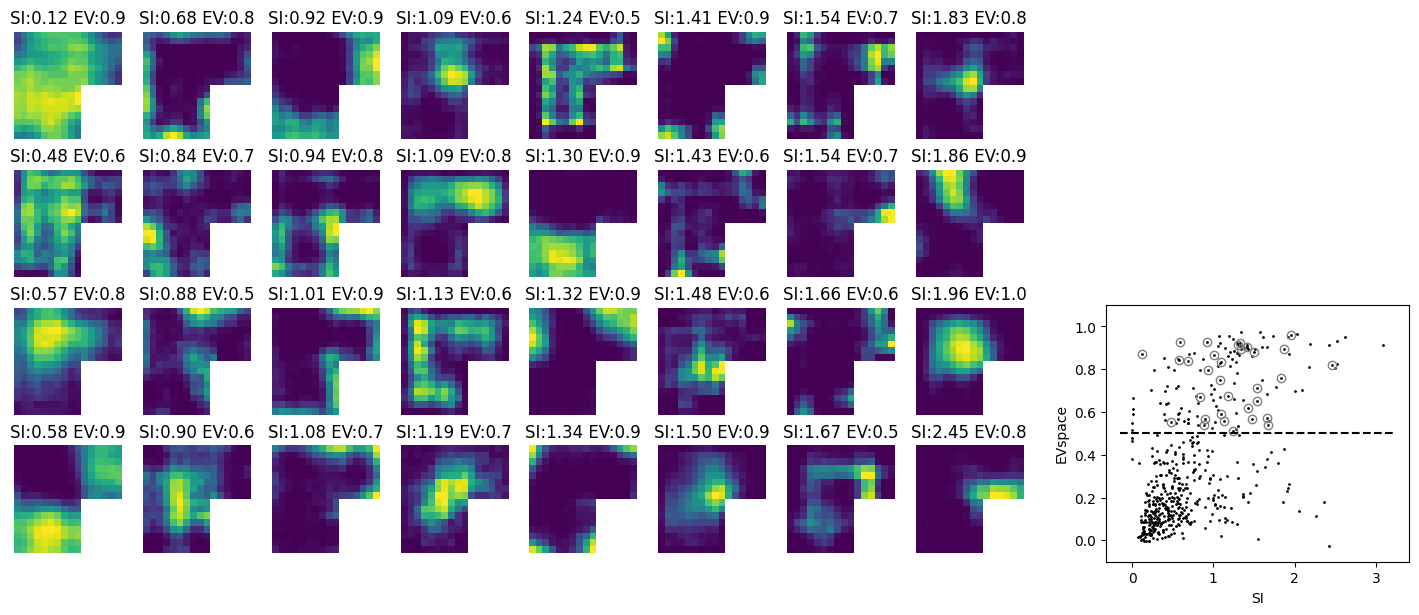

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win_noLN
0.0
0.03


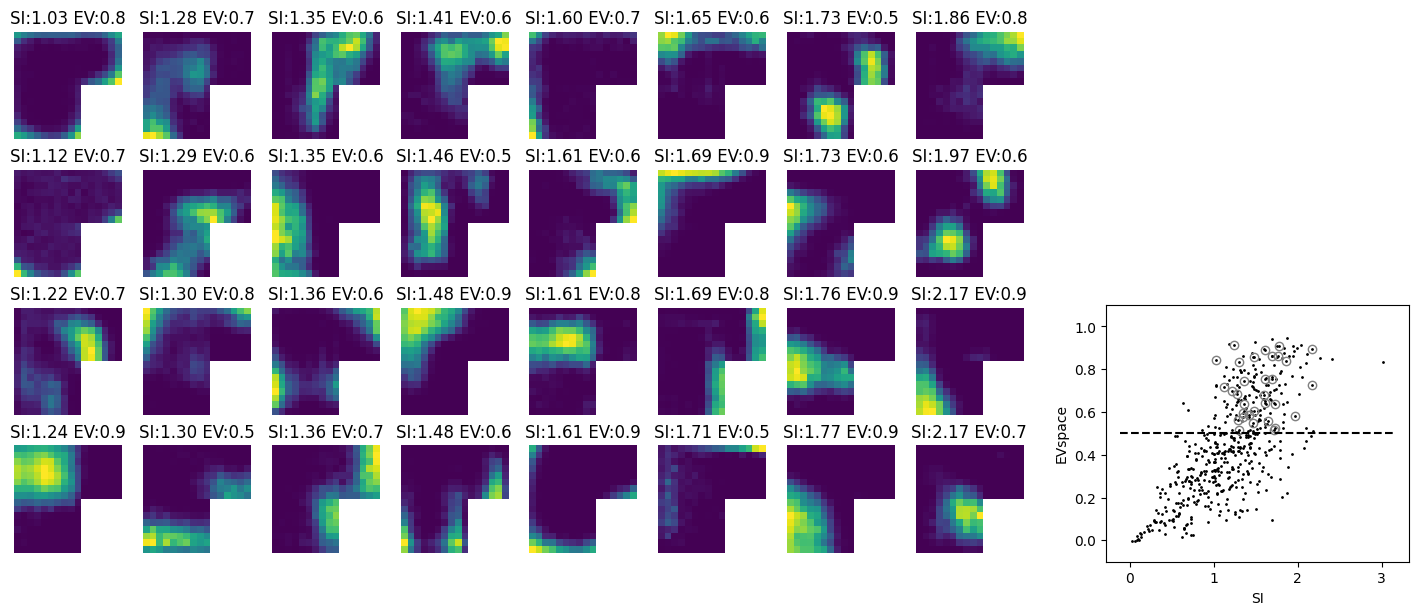

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win_noLN
0.0
0.0


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


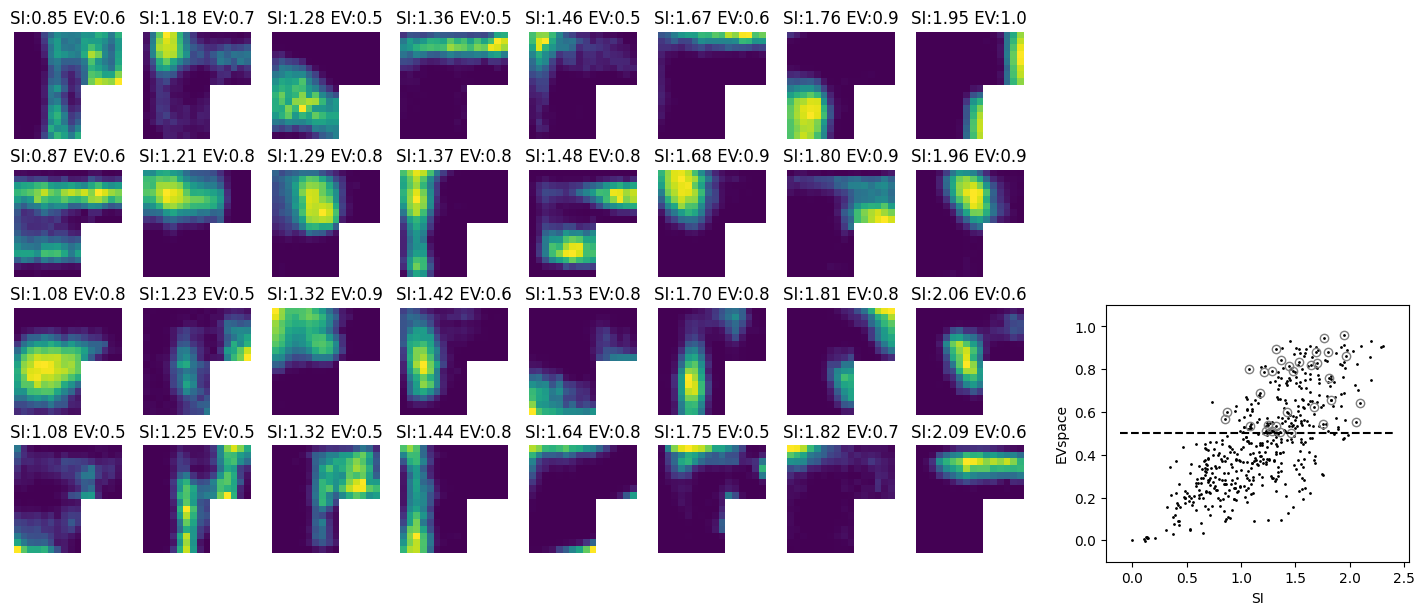

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win_noLN
0.15
0.03


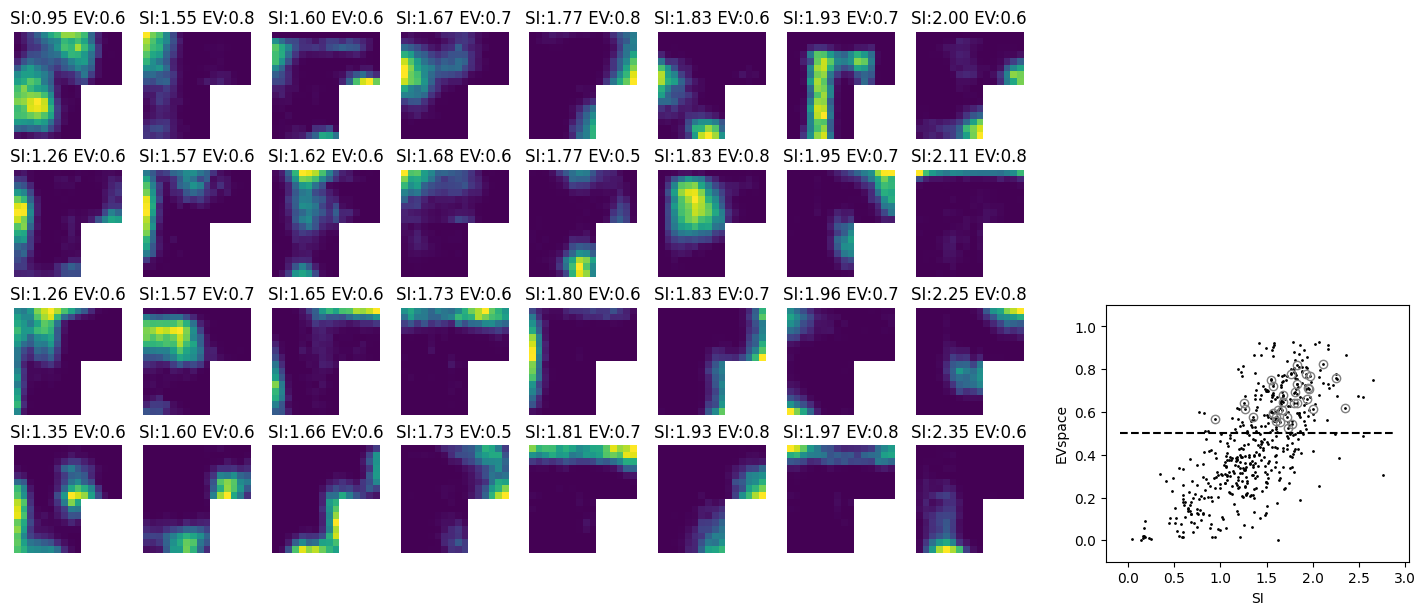

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win_noLN
0.15
0.0


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


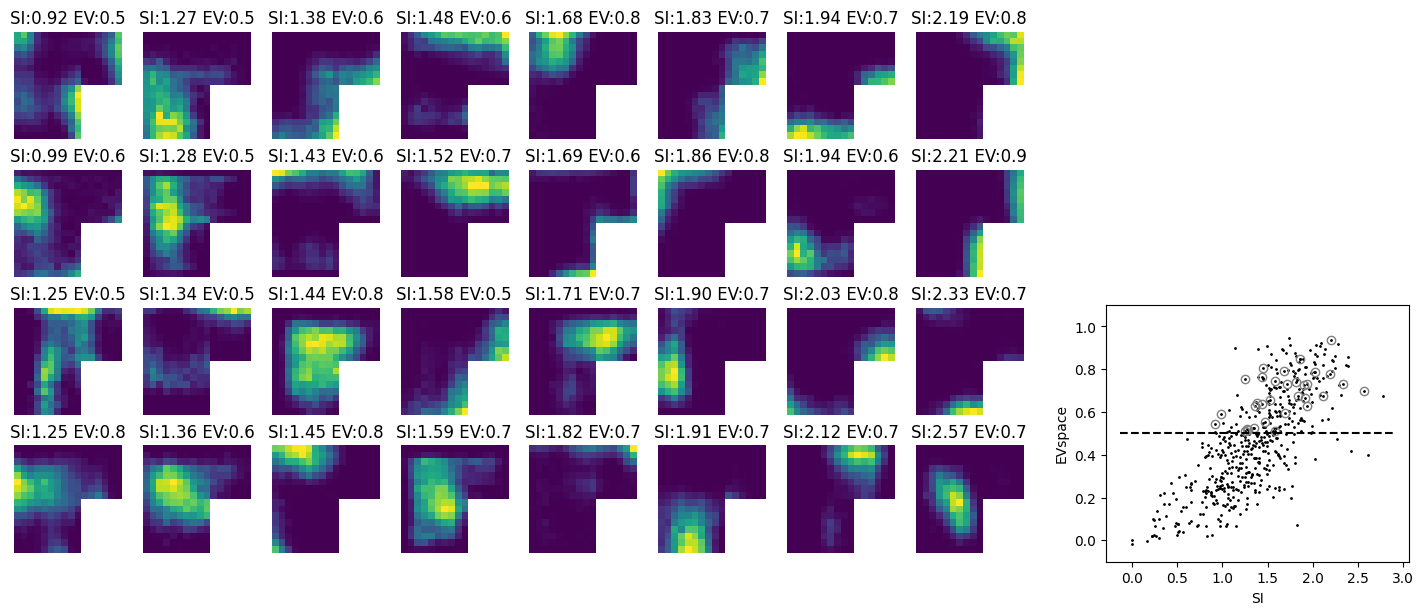

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win
0.0
0.03


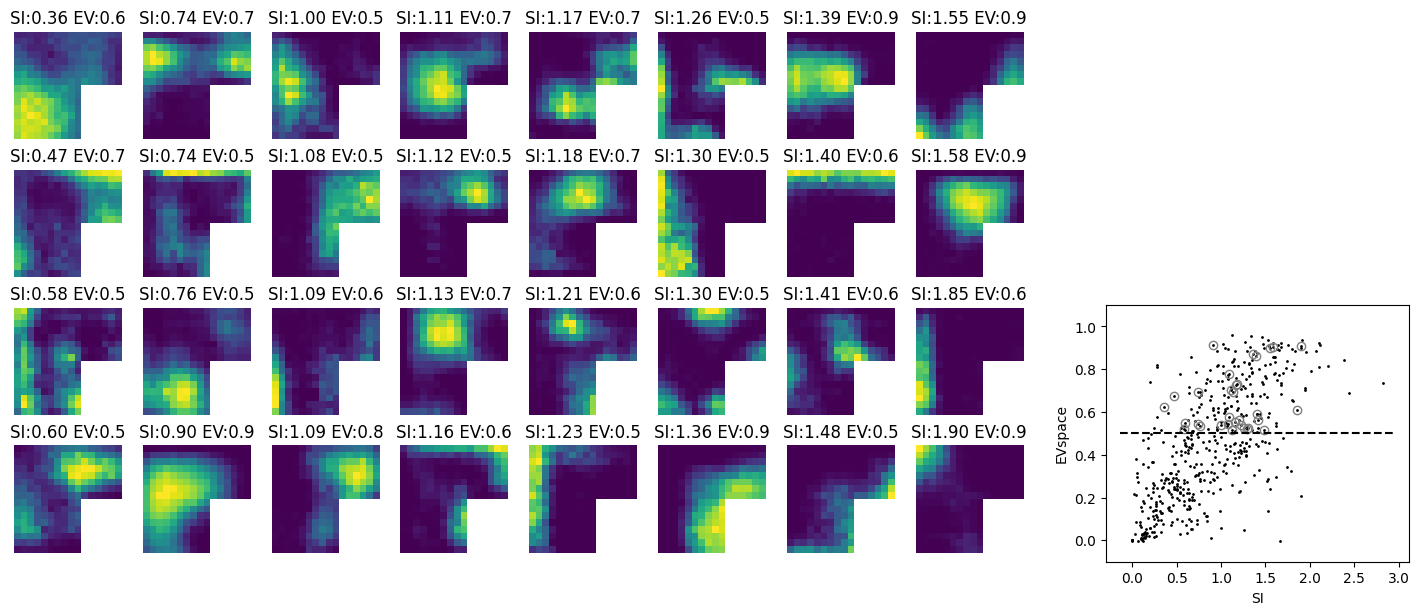

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win
0.0
0.0


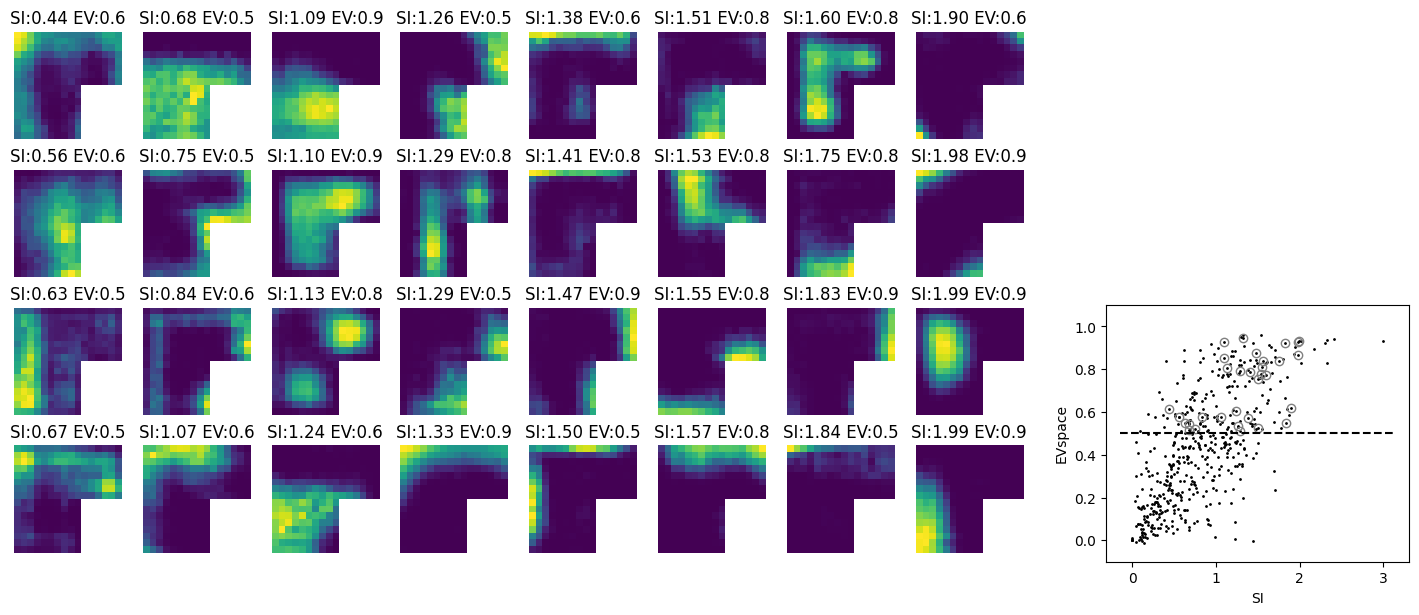

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win
0.15
0.03


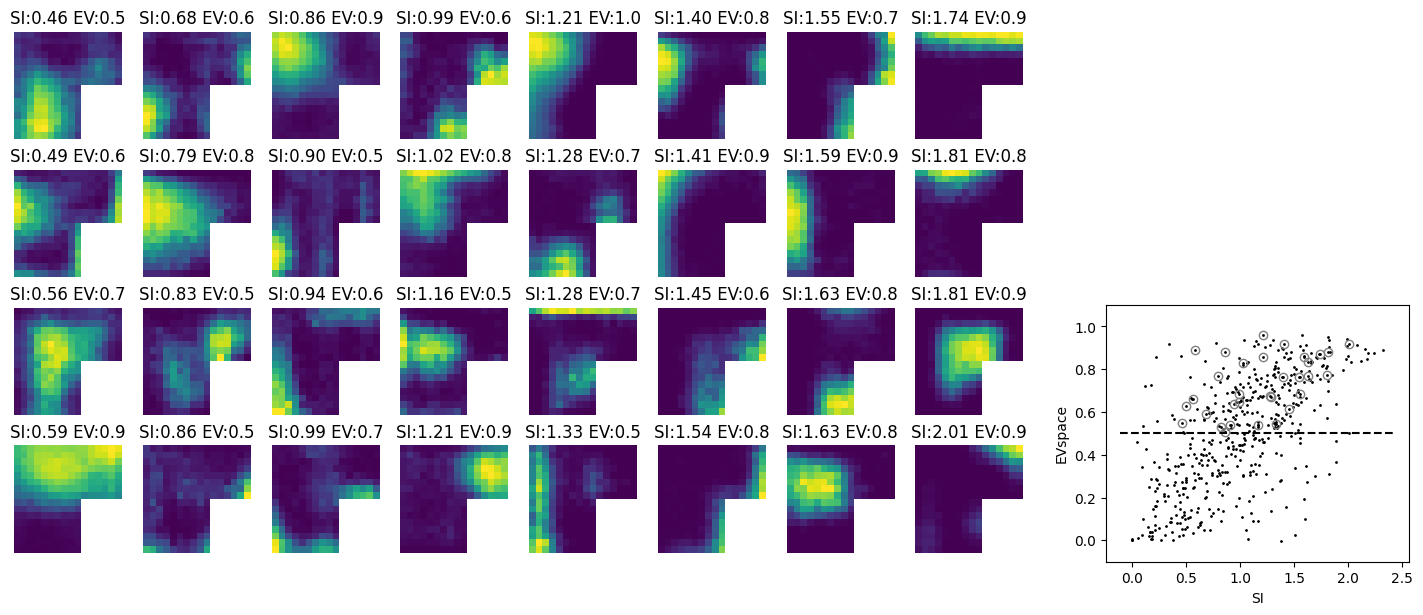

Getting Tuning Curves for Input Units


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE
Calculating EV_s
Calculating EV_s for input control
thRNN_5win
0.15
0.0


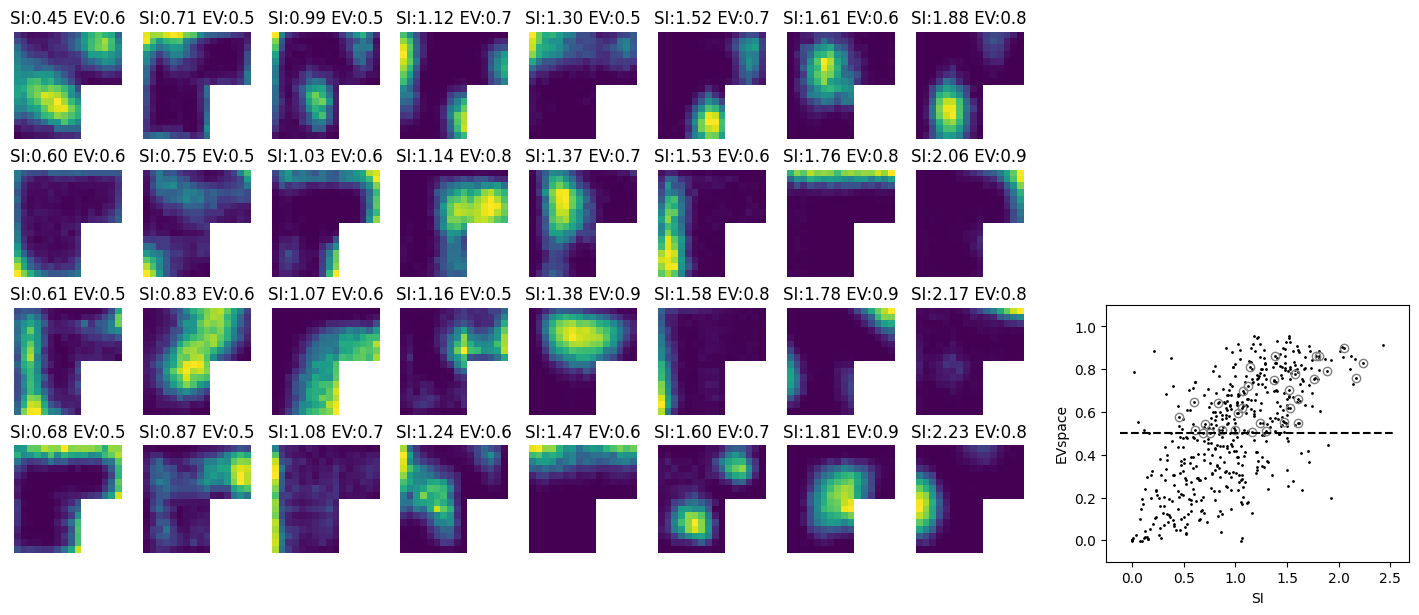

In [13]:
def TuningCurvePlot(row):
    predictiveNet = row['net']
    STA = SpatialTuningAnalysis(predictiveNet,inputControl=True, untrainedControl=False,ratenorm=True)
    netname = row['type'] + 's' + str(int(row['seed'])) + '_drop' + str(int(np.ceil(row['dropp']))) + '_noise' + str(int(np.ceil(row['noisestd'])))

    print(row['type'])
    print(row['dropp'])
    print(row['noisestd'])
    STA.TCExamplesFigure(netname,savefolder)
    plt.show()
    
    return STA
analysisFrame_exSeed['STA'] = analysisFrame_exSeed.apply(TuningCurvePlot, axis = 1)

In [16]:
from analysis.representationalGeometryAnalysis import representationalGeometryAnalysis

AutoencoderPred
0.0
0.03
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


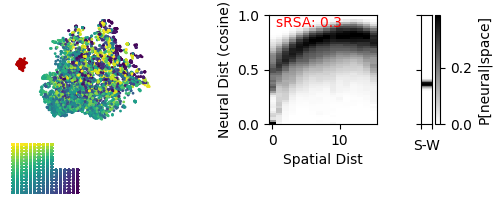

AutoencoderPred
0.0
0.0
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


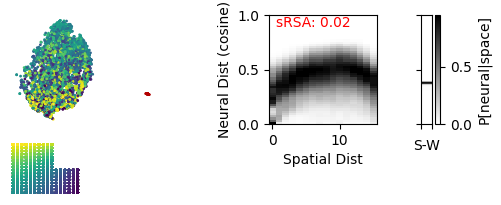

AutoencoderPred
0.15
0.03
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


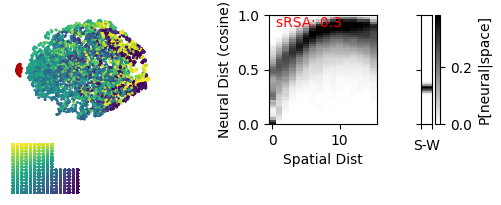

AutoencoderPred
0.15
0.0
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


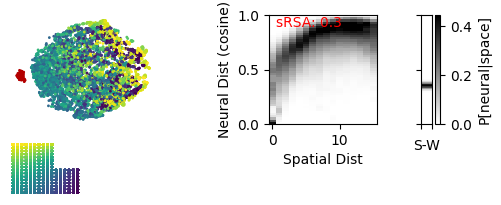

AutoencoderPred_LN
0.0
0.03
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


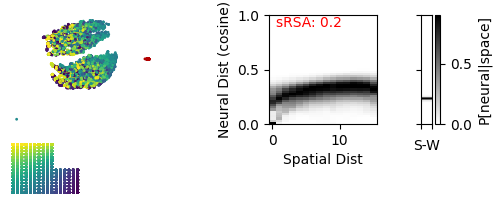

AutoencoderPred_LN
0.0
0.0
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


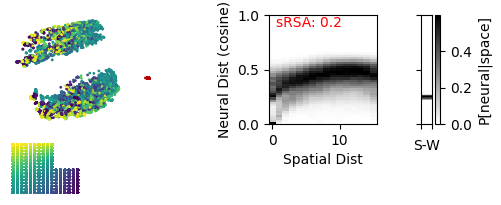

AutoencoderPred_LN
0.15
0.03
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


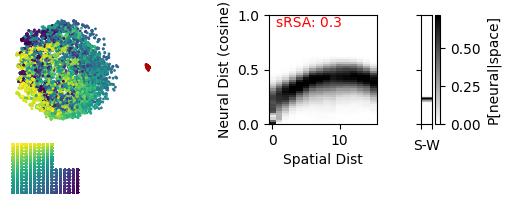

AutoencoderPred_LN
0.15
0.0
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


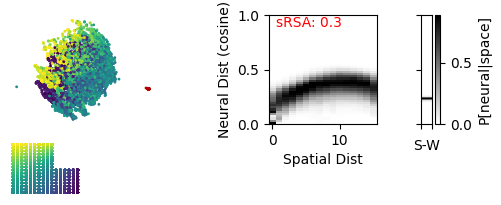

thRNN_5win_noLN
0.0
0.03
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


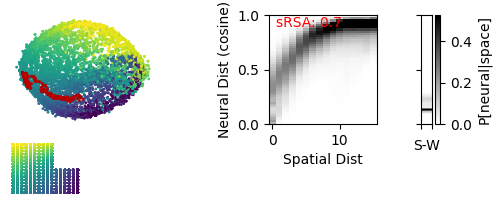

thRNN_5win_noLN
0.0
0.0
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


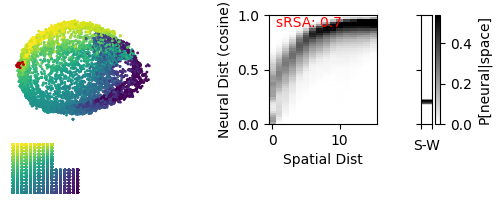

thRNN_5win_noLN
0.15
0.03
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


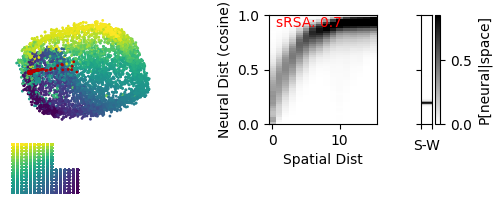

thRNN_5win_noLN
0.15
0.0
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


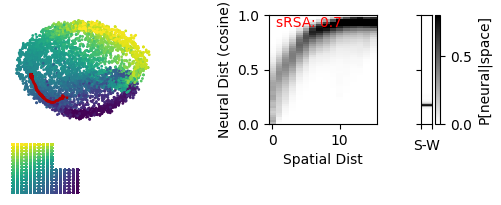

thRNN_5win
0.0
0.03
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


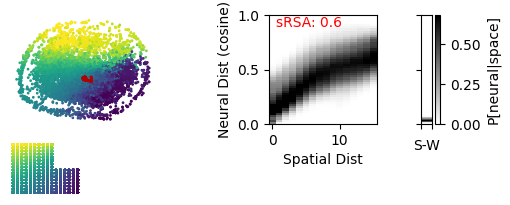

thRNN_5win
0.0
0.0
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


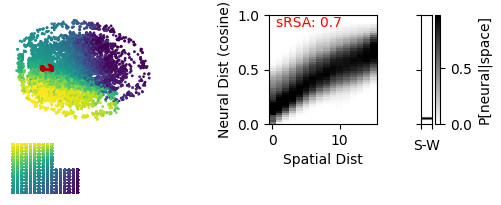

thRNN_5win
0.15
0.03
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


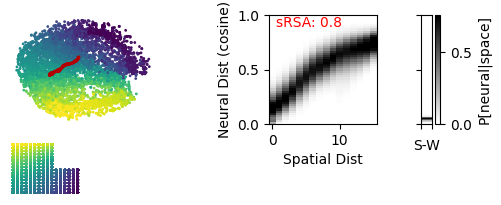

thRNN_5win
0.15
0.0
Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/representationalGeometryAnalysis.py:313: RuntimeWarning: invalid value encountered in divide
  hist2 = hist2/np.sum(hist2,axis=0)
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Running SLEEP
Fitting Isomap


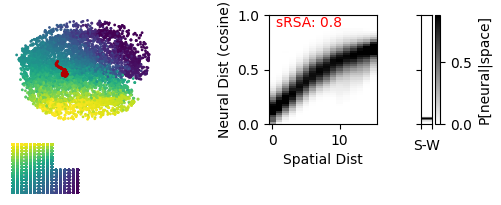

In [18]:
def RepresentationalGeometry(row):
    predictiveNet = row['net']
    print(row['type'])
    print(row['dropp'])
    print(row['noisestd'])
    netname = row['type'] + 's' + str(int(row['seed'])) + '_drop' + str(int(np.ceil(row['dropp']))) + '_noise' + str(int(np.ceil(row['noisestd'])))

    RGA = representationalGeometryAnalysis(predictiveNet,noisemag = 0, noisestd=0.1, withIsomap=True)
    RGA.WakeSleepFigure(netname,savefolder)
    plt.show()
    
    return RGA
analysisFrame_exSeed['RGA'] = analysisFrame_exSeed.apply(RepresentationalGeometry, axis = 1)

In [19]:
from analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis
from analysis.DiffusionReplayAnalysis import DiffusionReplayAnalysis

In [20]:
def OfflineReplay(row):
    predictiveNet = row['net']
    print(row['type'])
    print(row['dropp'])
    print(row['noisestd'])
    
    netname = row['type'] + 's' + str(int(row['seed'])) + '_drop' + str(int(np.ceil(row['dropp']))) + '_noise' + str(int(np.ceil(row['noisestd'])))
    OTA = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=0.03,
                               withIsomap=False, decoder='train', calculateViewSimilarity=True)
    DRA = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = 0.03)   
    
    OTA.SpontTrajectoryFigure(netname+'_noise',savefolder, trajRange=(250,275))
    DRA.DiffusionFigure(netname+'_noise', savefolder)
    plt.show()
    
    OTA_query = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=0.03,
                                   withIsomap=False, decoder=OTA.decoder,
                                         actionAgent=True,  calculateViewSimilarity=True)
    DRA_query = DiffusionReplayAnalysis(predictiveNet, decoder = OTA.decoder,
                                compareWake=True, actionAgent=True,
                                  noisestd = 0.03)
    
    OTA_query.SpontTrajectoryFigure(netname+'_query',savefolder, trajRange=(250,275))
    DRA_query.DiffusionFigure(netname+'_query', savefolder)
    
    
    Combinbed = [OTA.ViewSimilarity['MSE_real'][0],
                OTA.ViewSimilarity['MSE_wake'][0],
                OTA.ViewSimilarity['MSE_sleep'][0],
                OTA_query.ViewSimilarity['MSE_sleep'][0]]
    
    Combined_delay = [OTA.ViewSimilarity['meanstd_real'][0],
                OTA.ViewSimilarity['meanstd_wake'][0],
                OTA.ViewSimilarity['meanstd_sleep'][0],
                OTA_query.ViewSimilarity['meanstd_sleep'][0]]
    
    fg = plt.figure(figsize=(9,5))
    plt.subplot(2,2,1)
    plt.boxplot(Combinbed,
               showfliers=False,
               labels=['W-Real','W-Decode','S-Noise','S-Query'])
    plt.ylim([-0.5,1])
    plt.ylabel('View-Prediction Correlation')

    data = np.array(Combined_delay)
    plt.subplot(2,2,2)
    plt.plot(data.T)
    plt.ylim([0,0.75])
    plt.ylabel('View-Prediction Correlation')
    plt.xlabel('Delay')
    plt.legend(['W-Real','W-Decode','S-Noise','S-Query'])

    plt.tight_layout()
    saveFig(fg,'CompareReplay_'+netname,savefolder,
                        filetype='pdf')
    plt.show()
    
    
    return OTA, DRA, OTA_query, DRA_query
#analysisFrame[['OTA', 'DRA', 'OTA_query', 'DRA_query']] = analysisFrame.apply(OfflineReplay, axis = 1, result_type="expand")

In [22]:
analysisFrame.iloc[13:16]

,filename,type,netfolder,net,lr,bptt,seqdur,seed,dropp,ntimescale,weight_decay,nneurons,noisestd,sparsity
13,thRNN_5win-1-s3,thRNN_5win,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,3.0,0.00,2.0,0.003,400.0,0.00,0.5
14,thRNN_5win-2-s3,thRNN_5win,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,3.0,0.15,2.0,0.003,400.0,0.03,0.5
15,thRNN_5win-3-s3,thRNN_5win,/compareSP_panel/,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,600.0,3.0,0.15,2.0,0.003,400.0,0.00,0.5


thRNN_5win
0.0
0.0


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr


Training Decoder on cuda...
loss: 5.815807 [    0\10000]
loss: 0.677646 [ 1000\10000]
loss: 0.463624 [ 2000\10000]
loss: 0.362396 [ 3000\10000]
loss: 0.295496 [ 4000\10000]
loss: 0.254660 [ 5000\10000]
loss: 0.224658 [ 6000\10000]
loss: 0.201617 [ 7000\10000]
loss: 0.182620 [ 8000\10000]
loss: 0.167003 [ 9000\10000]
loss: 0.155983 [ 9999\10000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.432019 [    0\10000]
loss: 0.011811 [ 1000\10000]
loss: 0.005403 [ 2000\10000]
loss: 0.003261 [ 3000\10000]
loss: 0.002048 [ 4000\10000]
loss: 0.001307 [ 5000\10000]
loss: 0.000833 [ 6000\10000]
loss: 0.000540 [ 7000\10000]
loss: 0.000343 [ 8000\10000]
loss: 0.000220 [ 9000\10000]
loss: 0.000138 [ 9999\10000]
Training Complete. Back to the cpu
Running SLEEP
Running WAKE
setting zero-values to min (0.01)


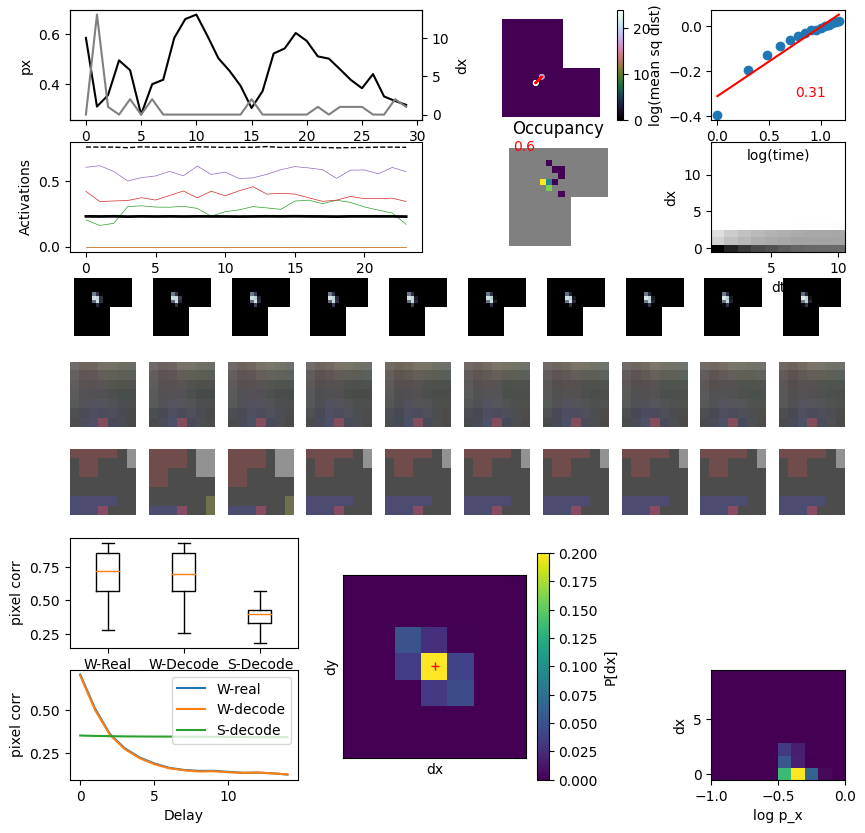

/home/mila/d/daniel.levenstein/PredictiveReplay/utils/DiffusionReplayAnalysis.py:235: RuntimeWarning: divide by zero encountered in log10
  mean_msd = np.mean(np.log10(msd),axis=0, where=msd>0)
/home/mila/d/daniel.levenstein/PredictiveReplay/utils/DiffusionReplayAnalysis.py:236: RuntimeWarning: divide by zero encountered in log10
  std_msd = np.nanstd(np.log10(msd), where=msd>0)


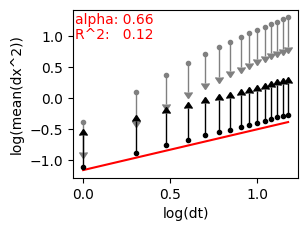

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/utils/OfflineTrajectoryAnalysis.py:222: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


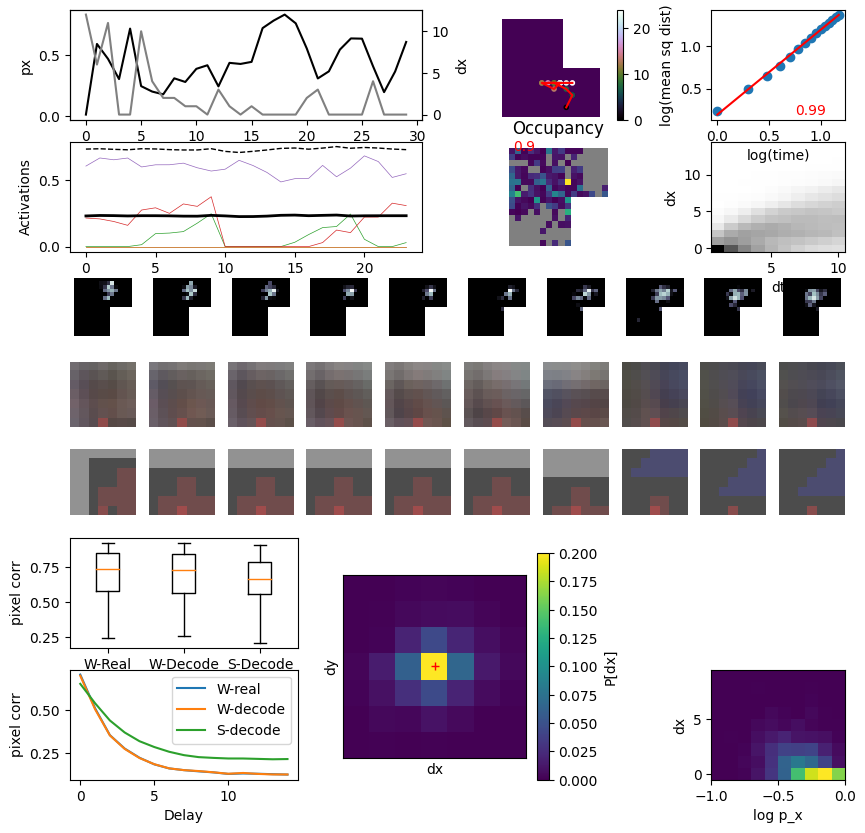

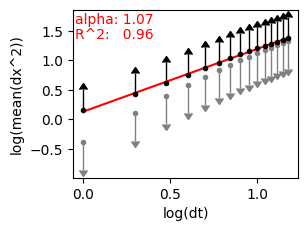

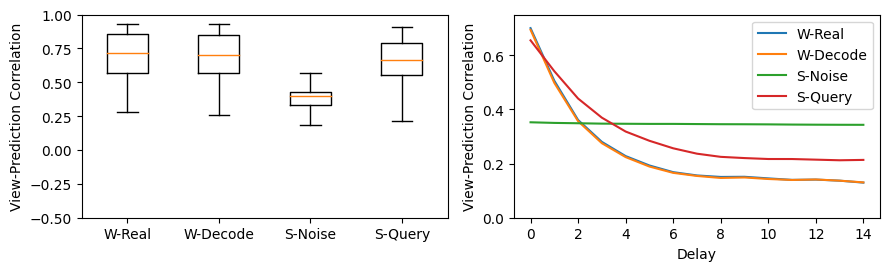

thRNN_5win
0.15
0.03


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr


Training Decoder on cuda...
loss: 5.788439 [    0\10000]
loss: 0.780210 [ 1000\10000]
loss: 0.553166 [ 2000\10000]
loss: 0.433617 [ 3000\10000]
loss: 0.367656 [ 4000\10000]
loss: 0.319607 [ 5000\10000]
loss: 0.284385 [ 6000\10000]
loss: 0.254966 [ 7000\10000]
loss: 0.231671 [ 8000\10000]
loss: 0.216609 [ 9000\10000]
loss: 0.202056 [ 9999\10000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.441071 [    0\10000]
loss: 0.012219 [ 1000\10000]
loss: 0.005661 [ 2000\10000]
loss: 0.003351 [ 3000\10000]
loss: 0.002113 [ 4000\10000]
loss: 0.001356 [ 5000\10000]
loss: 0.000886 [ 6000\10000]
loss: 0.000568 [ 7000\10000]
loss: 0.000362 [ 8000\10000]
loss: 0.000233 [ 9000\10000]
loss: 0.000150 [ 9999\10000]
Training Complete. Back to the cpu
Running SLEEP
Running WAKE
setting zero-values to min (0.01)


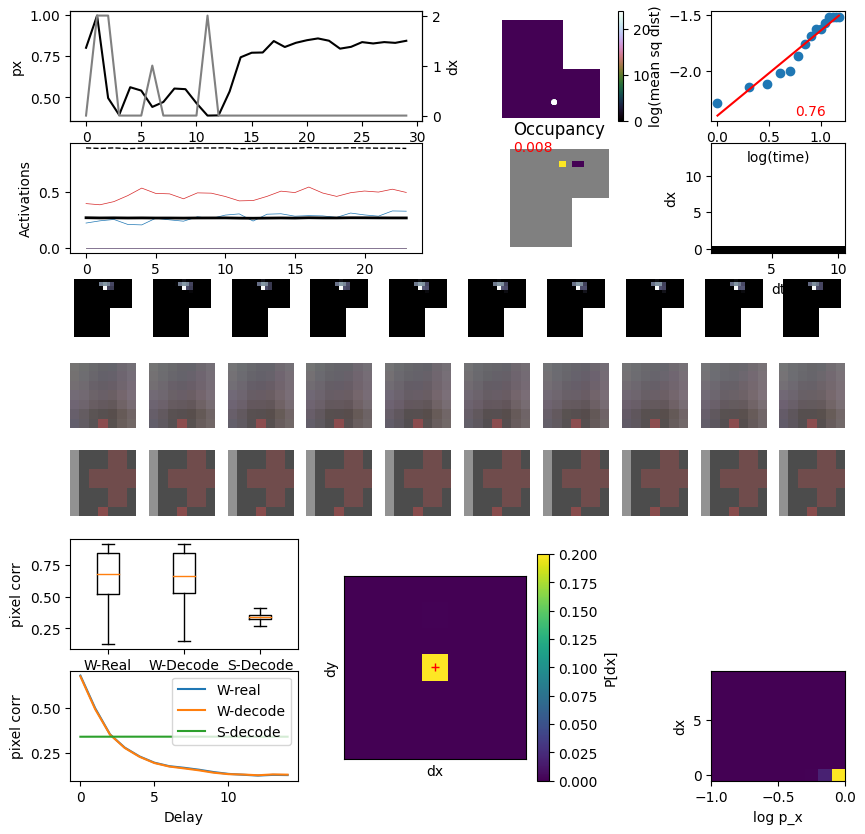

/home/mila/d/daniel.levenstein/PredictiveReplay/utils/DiffusionReplayAnalysis.py:235: RuntimeWarning: divide by zero encountered in log10
  mean_msd = np.mean(np.log10(msd),axis=0, where=msd>0)
/home/mila/d/daniel.levenstein/PredictiveReplay/utils/DiffusionReplayAnalysis.py:236: RuntimeWarning: divide by zero encountered in log10
  std_msd = np.nanstd(np.log10(msd), where=msd>0)


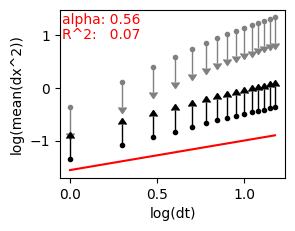

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/utils/OfflineTrajectoryAnalysis.py:222: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


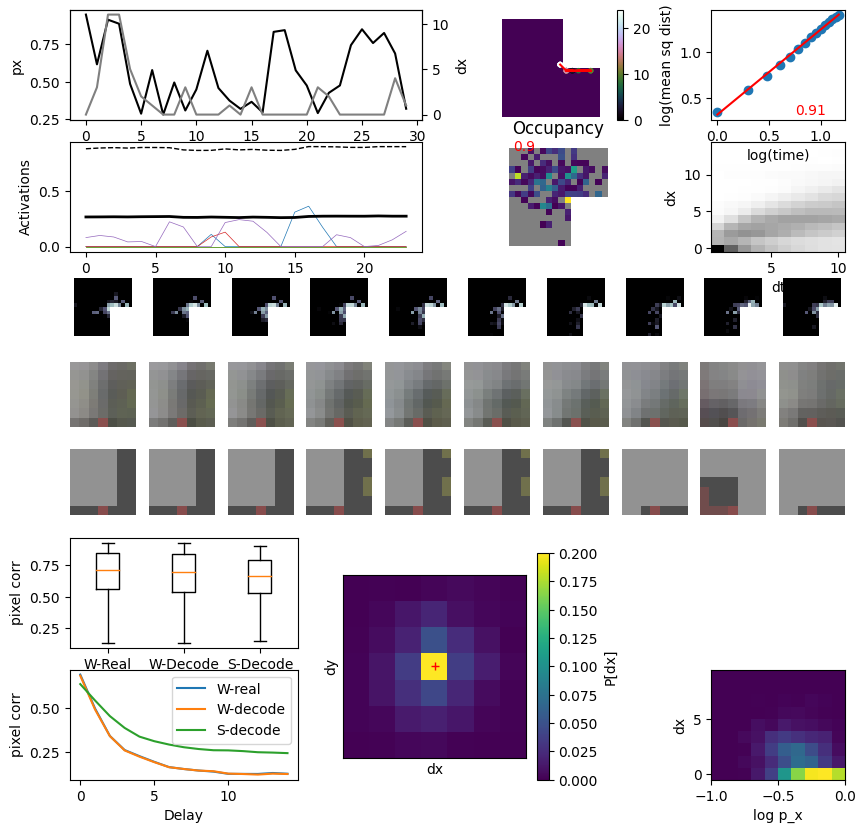

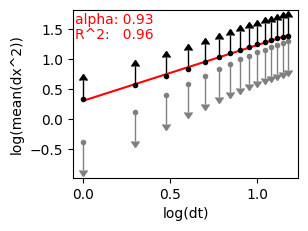

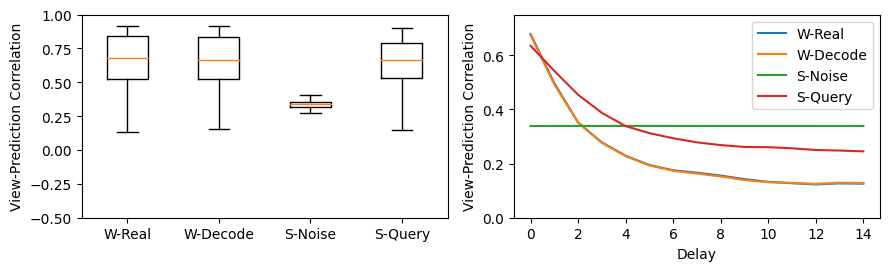

thRNN_5win
0.15
0.0


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr


Training Decoder on cuda...
loss: 5.794474 [    0\10000]
loss: 0.796665 [ 1000\10000]
loss: 0.570701 [ 2000\10000]
loss: 0.457409 [ 3000\10000]
loss: 0.386580 [ 4000\10000]
loss: 0.338984 [ 5000\10000]
loss: 0.302622 [ 6000\10000]
loss: 0.278582 [ 7000\10000]
loss: 0.255281 [ 8000\10000]
loss: 0.240247 [ 9000\10000]
loss: 0.230336 [ 9999\10000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.442189 [    0\10000]
loss: 0.012503 [ 1000\10000]
loss: 0.005815 [ 2000\10000]
loss: 0.003442 [ 3000\10000]
loss: 0.002200 [ 4000\10000]
loss: 0.001395 [ 5000\10000]
loss: 0.000898 [ 6000\10000]
loss: 0.000575 [ 7000\10000]
loss: 0.000367 [ 8000\10000]
loss: 0.000239 [ 9000\10000]
loss: 0.000156 [ 9999\10000]
Training Complete. Back to the cpu
Running SLEEP
Running WAKE


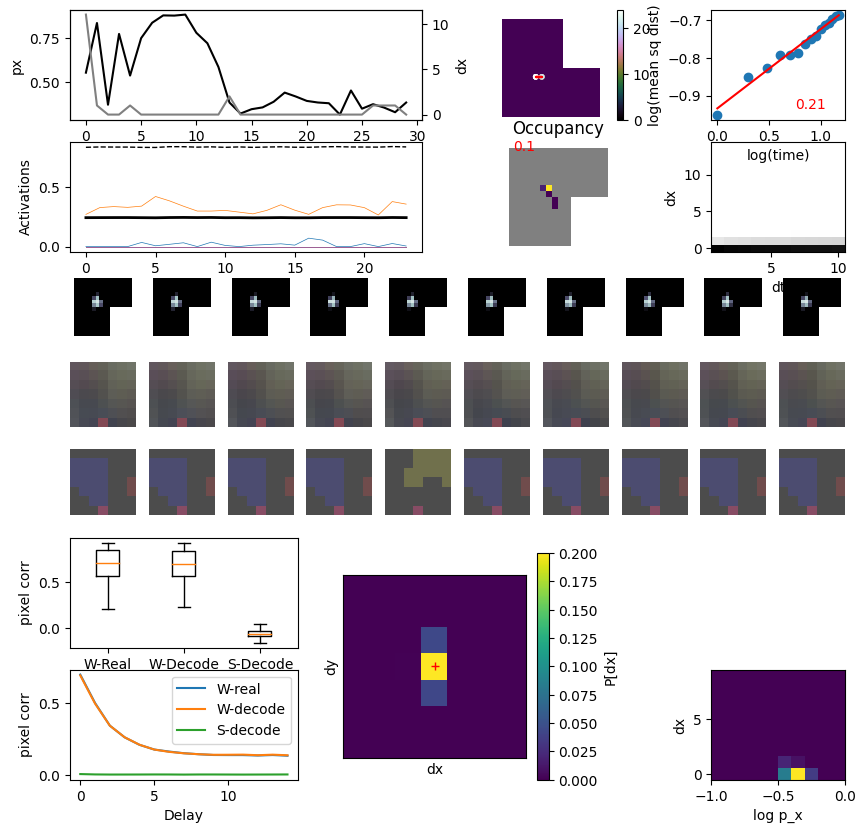

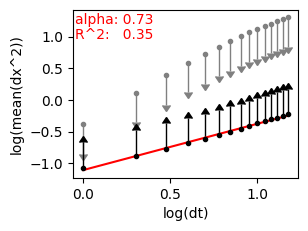

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/utils/OfflineTrajectoryAnalysis.py:222: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


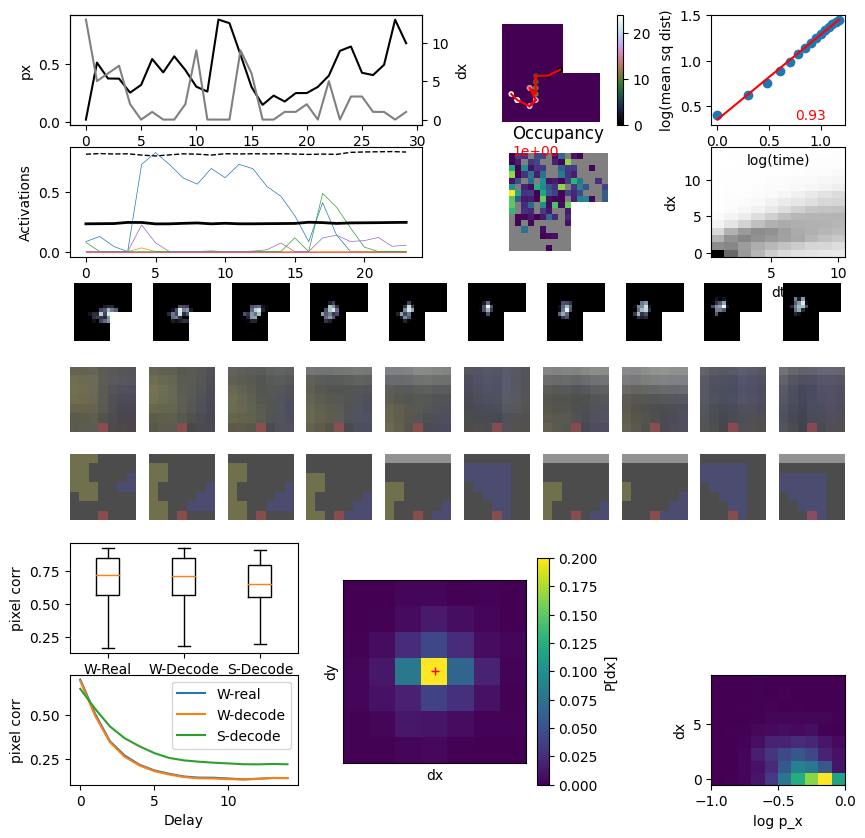

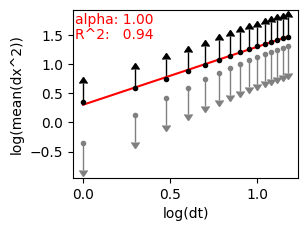

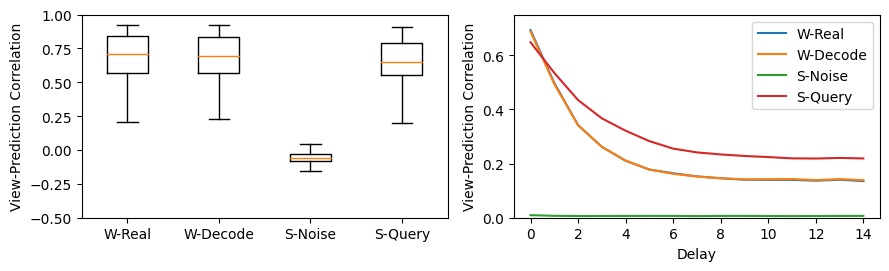

/tmp/ipykernel_51672/3977863271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisFrame.iloc[13:16][['OTA', 'DRA', 'OTA_query', 'DRA_query']] = analysisFrame.iloc[13:16].apply(OfflineReplay, axis = 1, result_type="expand")
/tmp/ipykernel_51672/3977863271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysisFrame.iloc[13:16][['OTA', 'DRA', 'OTA_query', 'DRA_query']] = analysisFrame.iloc[13:16].apply(OfflineReplay, axis = 1, result_type="expand")
/tmp/ipykernel_51672/3977863271.py:1: SettingW

In [23]:
analysisFrame.iloc[13:16][['OTA', 'DRA', 'OTA_query', 'DRA_query']] = analysisFrame.iloc[13:16].apply(OfflineReplay, axis = 1, result_type="expand")